# Q* Learning with FrozenLake 🕹️⛄ (DETERMINISTIC VERSION)
<br> 
## This is not the tutorial version, but a deterministic version
In this Notebook, we'll implement an agent <b>that plays FrozenLake.</b>
<img src="frozenlake.png" alt="Frozen Lake"/>

The goal of this game is <b>to go from the starting state (S) to the goal state (G)</b> by walking only on frozen tiles (F) and avoid holes (H).However, the ice is slippery, <b>so you won't always move in the direction you intend.</b>
<br><br>
This version was made by [lukewys](https://github.com/lukewys)

# This is a notebook from [Deep Reinforcement Learning Course with Tensorflow](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)
<img src="https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/docs/assets/img/DRLC%20Environments.png" alt="Deep Reinforcement Course"/>
<br>
<p>  Deep Reinforcement Learning Course is a free series of articles and videos tutorials 🆕 about Deep Reinforcement Learning, where **we'll learn the main algorithms (Q-learning, Deep Q Nets, Dueling Deep Q Nets, Policy Gradients, A2C, Proximal Policy Gradients…), and how to implement them with Tensorflow.**
<br><br>
    
📜The articles explain the architectures from the big picture to the mathematical details behind them.
<br>
📹 The videos explain how to build the agents with Tensorflow </b></p>
<br>
This course will give you a **solid foundation for understanding and implementing the future state of the art algorithms**. And, you'll build a strong professional portfolio by creating **agents that learn to play awesome environments**: Doom© 👹, Space invaders 👾, Outrun, Sonic the Hedgehog©, Michael Jackson’s Moonwalker, agents that will be able to navigate in 3D environments with DeepMindLab (Quake) and able to walk with Mujoco. 
<br><br>
</p> 

## 📚 The complete [Syllabus HERE](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)


## Any questions 👨‍💻
<p> If you have any questions, feel free to ask me: </p>
<p> 📧: <a href="mailto:hello@simoninithomas.com">hello@simoninithomas.com</a>  </p>
<p> Github: https://github.com/simoninithomas/Deep_reinforcement_learning_Course </p>
<p> 🌐 : https://simoninithomas.github.io/Deep_reinforcement_learning_Course/ </p>
<p> Twitter: <a href="https://twitter.com/ThomasSimonini">@ThomasSimonini</a> </p>
<p> Don't forget to <b> follow me on <a href="https://twitter.com/ThomasSimonini">twitter</a>, <a href="https://github.com/simoninithomas/Deep_reinforcement_learning_Course">github</a> and <a href="https://medium.com/@thomassimonini">Medium</a> to be alerted of the new articles that I publish </b></p>
    
## How to help  🙌
3 ways:
- **Clap our articles and like our videos a lot**:Clapping in Medium means that you really like our articles. And the more claps we have, the more our article is shared Liking our videos help them to be much more visible to the deep learning community.
- **Share and speak about our articles and videos**: By sharing our articles and videos you help us to spread the word. 
- **Improve our notebooks**: if you found a bug or **a better implementation** you can send a pull request.
<br>

## Important note 🤔
<b> You can run it on your computer but it's better to run it on GPU based services</b>, personally I use Microsoft Azure and their Deep Learning Virtual Machine (they offer 170$)
https://azuremarketplace.microsoft.com/en-us/marketplace/apps/microsoft-ads.dsvm-deep-learning
<br>
⚠️ I don't have any business relations with them. I just loved their excellent customer service.

If you have some troubles to use Microsoft Azure follow the explainations of this excellent article here (without last the part fast.ai): https://medium.com/@manikantayadunanda/setting-up-deeplearning-machine-and-fast-ai-on-azure-a22eb6bd6429

## Prerequisites 🏗️
Before diving on the notebook **you need to understand**:
- The foundations of Reinforcement learning (MC, TD, Rewards hypothesis...) [Article](https://medium.freecodecamp.org/an-introduction-to-reinforcement-learning-4339519de419)
- Q-learning [Article](https://medium.freecodecamp.org/diving-deeper-into-reinforcement-learning-with-q-learning-c18d0db58efe)
- In the [video version](https://www.youtube.com/watch?v=q2ZOEFAaaI0)  we implemented a Q-learning agent that learns to play OpenAI Taxi-v2 🚕 with Numpy.

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/q2ZOEFAaaI0?showinfo=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

## Step 0: Import the dependencies 📚
We use 3 libraries:
- `Numpy` for our Qtable
- `OpenAI Gym` for our FrozenLake Environment
- `Random` to generate random numbers

In [2]:
import numpy as np
import gym
import random

## Step 1: Create the environment 🎮
- Here we'll create the FrozenLake environment. 
- OpenAI Gym is a library <b> composed of many environments that we can use to train our agents.</b>
- In our case we choose to use Frozen Lake.

In [3]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.8196, # optimum = .8196, changing this seems have no influence
)

env = gym.make('FrozenLakeNotSlippery-v0')

In [4]:
env.render()


SFFF
FHFH
FFFH
HFFG


## Step 2: Create the Q-table and initialize it 🗄️
- Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [5]:
action_size = env.action_space.n
print('Number of actions: ', action_size)

state_size = env.observation_space.n
print('Number of states: ', state_size)

Number of actions:  4
Number of states:  16


In [6]:
qtable = np.zeros((state_size,action_size))
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Step 3: Create the hyperparameters ⚙️
- Here, we'll specify the hyperparameters

In [7]:
total_episodes = 10000
total_test_episodes = 100
max_steps = 99 # Max steps per episode

learning_rate = 0.7
gamma = 0.618 # discount rate ; smaller discount rate means care more about close values

# exploration parameters
epsilon = 1.0 # exploration rate
max_epsilon = 1.0 # exploration probablity at state
min_epsilon = 0.01 # minimum exploration probability
decay_rate = 0.001 # exponential decay rate for exploraation prob

## Step 4: The Q learning algorithm 🧠
- Now we implement the Q learning algorithm:
<img src="qtable_algo.png" alt="Q algo"/>

In [8]:
rewards = []
for episode in range(total_episodes):
    # reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards=0
    
    for step in range(max_steps): # for each step, decide an action
        if episode < 10:
            env.render()
        #decide whether exploration or exploitation
        exp_exp_tradeoff = random.uniform(0,1)
        #print('state ', state)
        if exp_exp_tradeoff > epsilon: # exploit
            action = np.argmax(qtable[state,:])
            #print('chose exploit')
            #print('argmax outputs ', action)
        else: #explore
            #print('chose exploration')
            action = env.action_space.sample() #sample from the actions
        
        new_state, reward, done, info = env.step(action)
        
        #print('action ',action)
        #print('new state ', new_state)
        #print('reward ', reward)
        #print('info ', info)
        
        #print('orginal qtable ', qtable[state,action])
        qtable[state,action]=qtable[state,action]+learning_rate*(reward+gamma*np.max(qtable[new_state,:]) - qtable[state,action])
        #print('new qtable ',qtable[state,action])
        #print('qtable[new_state] ', qtable[new_state,:], np.max(qtable[new_state,:]))
        total_rewards =total_rewards + reward
        state = new_state
        
        if done == True:
            if episode <10:
                env.render()
                print('--------------------------------------DONE---one game ended')
            break
            
    episode += 1
    
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)
print(epsilon)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
--------------------------------------DONE---one game ended

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
--------------------------------------DONE---one game ended

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
--------------------------------------DONE---one game ended

SFFF
FHFH
FFFH


(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

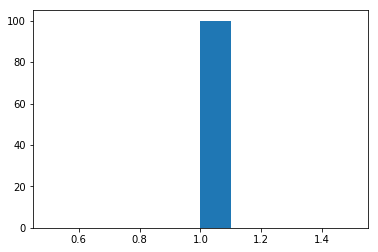

In [17]:
import matplotlib.pyplot as plt
plt.hist(rewards)
#having some difficulties with the rewards... still would like to better understand how the rewards work and how they can be manipulated...

## Step 5: Use our Q-table to play FrozenLake ! 👾
- After 10 000 episodes, our Q-table can be used as a "cheatsheet" to play FrozenLake"
- By running this cell you can see our agent playing FrozenLake.

In [10]:
env.reset()
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    print("***************************************")
    print('EPISODE ',episode)
    
    for step in range(max_steps):
        print("-------------")
        print('state ',state)
        env.render()
        action = np.argmax(qtable[state,:]) #qtable that we trained above
        print('action ',action)
        new_state, reward,done,info = env.step(action)
        
        total_rewards += reward
        
        if done:
            env.render()
            rewards.append(total_rewards)
            print("Score", total_rewards)
            break
        state = new_state
env.close()
print("Score over time: "+str(np.mean(rewards)))

***************************************
EPISODE  0
-------------
state  0

SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  4
  (Down)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  8
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  9
  (Right)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  13
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  14
  (Right)
SFFF
FHFH
FFFH
HFFG
action  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Score 1.0
***************************************
EPISODE  1
-------------
state  0

SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  4
  (Down)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  8
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  9
  (Right)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  13
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  14
  (Right)
SFFF
FHFH
FFFH
HFFG
action  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Score 1.0
***************************************
EPISODE  2
-------------
state  0

SFFF
FH

SFFF
FHFH
FFFH
HFFG
Score 1.0
***************************************
EPISODE  31
-------------
state  0

SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  4
  (Down)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  8
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  9
  (Right)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  13
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  14
  (Right)
SFFF
FHFH
FFFH
HFFG
action  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Score 1.0
***************************************
EPISODE  32
-------------
state  0

SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  4
  (Down)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  8
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  9
  (Right)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  13
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  14
  (Right)
SFFF
FHFH
FFFH
HFFG
action  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Score 1.0
***************************************
EPISODE  3

action  2
-------------
state  14
  (Right)
SFFF
FHFH
FFFH
HFFG
action  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Score 1.0
***************************************
EPISODE  55
-------------
state  0

SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  4
  (Down)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  8
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  9
  (Right)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  13
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  14
  (Right)
SFFF
FHFH
FFFH
HFFG
action  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Score 1.0
***************************************
EPISODE  56
-------------
state  0

SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  4
  (Down)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  8
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  9
  (Right)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  13
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  14
  (Right)
SFFF
FHFH
FFFH
HFFG
action  2
  (Rig

state  9
  (Right)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  13
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  14
  (Right)
SFFF
FHFH
FFFH
HFFG
action  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Score 1.0
***************************************
EPISODE  79
-------------
state  0

SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  4
  (Down)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  8
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  9
  (Right)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  13
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  14
  (Right)
SFFF
FHFH
FFFH
HFFG
action  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Score 1.0
***************************************
EPISODE  80
-------------
state  0

SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  4
  (Down)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  8
  (Down)
SFFF
FHFH
FFFH
HFFG
action  2
-------------
state  9
  (Right)
SFFF
FHFH
FFFH
HFFG
action  1
-------------
state  13
  (Down

In [11]:
qtable

array([[0.0557097 , 0.09014515, 0.09014515, 0.0557097 ],
       [0.0557097 , 0.        , 0.14586594, 0.09014515],
       [0.09014515, 0.23602903, 0.09014515, 0.14586594],
       [0.14586594, 0.        , 0.09014515, 0.09014515],
       [0.09014515, 0.14586594, 0.        , 0.0557097 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.381924  , 0.        , 0.14586594],
       [0.        , 0.        , 0.        , 0.        ],
       [0.14586594, 0.        , 0.23602903, 0.09014515],
       [0.14586594, 0.381924  , 0.381924  , 0.        ],
       [0.23602903, 0.618     , 0.        , 0.23602903],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.381924  , 0.618     , 0.23602903],
       [0.381924  , 0.618     , 1.        , 0.381924  ],
       [0.        , 0.        , 0.        , 0.        ]])

In [12]:
hi=np.arange(state_size)
hi=hi.reshape((16,1))
hey=np.arange(action_size+1)
hey=hey.reshape((1,5))
hey=hey-1

In [13]:
qtable.shape

(16, 4)

In [15]:
yay=np.hstack((hi,qtable))
yay=np.vstack((hey,yay))
yay

array([[-1.        ,  0.        ,  1.        ,  2.        ,  3.        ],
       [ 0.        ,  0.0557097 ,  0.09014515,  0.09014515,  0.0557097 ],
       [ 1.        ,  0.0557097 ,  0.        ,  0.14586594,  0.09014515],
       [ 2.        ,  0.09014515,  0.23602903,  0.09014515,  0.14586594],
       [ 3.        ,  0.14586594,  0.        ,  0.09014515,  0.09014515],
       [ 4.        ,  0.09014515,  0.14586594,  0.        ,  0.0557097 ],
       [ 5.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 6.        ,  0.        ,  0.381924  ,  0.        ,  0.14586594],
       [ 7.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 8.        ,  0.14586594,  0.        ,  0.23602903,  0.09014515],
       [ 9.        ,  0.14586594,  0.381924  ,  0.381924  ,  0.        ],
       [10.        ,  0.23602903,  0.618     ,  0.        ,  0.23602903],
       [11.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [12.        ,  0.        ,  0. 

In [16]:
#PRINT THE ACTION IN EVERY PLACE
#just trained on one map
print(np.argmax(qtable,axis=1).reshape(4,4))

[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]


I realized that we are just training on one map because like the Taxi, the map doesnt change. In the taxi, things were changing every episode because the passanger pick up, drop off, and starting position were different. However, in this game Frozen Lake, the starting position is the same and the drop off position is the same. Future Directions: Look into how to change the starting and ending positions.

Since we are trying to determine the best action for each state, this is a policy-based reinforcement learning algorithm.